# Import Library

In [1]:
from math import floor
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

# Create Simple fully connected network

In [2]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        
        self.fc1 = nn.Linear(input_size, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, num_classes)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Set device and hyperparameter

In [3]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device = {}".format(device))

Using device = cuda


In [4]:
# Hyperparameters
input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 256
num_epochs = 10

# Load data and model

In [5]:
# Load data
train_dataset = datasets.MNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

valid_dataset = datasets.MNIST(root='dataset/', train=False, transform=transforms.ToTensor(), download=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Initialize network
model = NN(input_size=input_size, num_classes=num_classes).to(device=device)

# Loss ans optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=learning_rate)

In [6]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28), device=device)

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            78,500
├─Linear: 1-2                            10,100
├─Linear: 1-3                            1,010
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            78,500
├─Linear: 1-2                            10,100
├─Linear: 1-3                            1,010
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0

# Training

In [7]:
train_acc_his = []
valid_acc_his = []

In [8]:
# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    if loader.dataset.train:
        print("Train data: ", end="")
    else:
        print("Valid data: ", end="")
    
    num_correct = 0
    num_sample = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            x = x.reshape(x.shape[0], -1)
            
            scores = model(x)
            _, prediction = scores.max(1)
            num_correct += (prediction == y).sum()
            num_sample += prediction.size(0)
            
        print(f"Got {num_correct} / {num_sample} with accuracy {float(num_correct)/float(num_sample) * 100:.2f} %")

    model.train()

    return float(num_correct) / float(num_sample)

In [9]:
# Train network
for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)
        
        # Get to correct shape
        data = data.reshape(data.shape[0], -1)
        
        # forward
        scores = model(data)
        loss = criterion(scores, target)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient descent or Adam step
        optimizer.step()
        
    print(f"\nEpoch {epoch + 1}:")
    train_acc_his.append(check_accuracy(train_loader, model))
    valid_acc_his.append(check_accuracy(valid_loader, model))


Epoch 1:
Train data: Got 55865 / 60000 with accuracy 93.11 %
Valid data: Got 9304 / 10000 with accuracy 93.04 %

Epoch 2:
Train data: Got 57138 / 60000 with accuracy 95.23 %
Valid data: Got 9500 / 10000 with accuracy 95.00 %

Epoch 3:
Train data: Got 57919 / 60000 with accuracy 96.53 %
Valid data: Got 9593 / 10000 with accuracy 95.93 %

Epoch 4:
Train data: Got 58264 / 60000 with accuracy 97.11 %
Valid data: Got 9645 / 10000 with accuracy 96.45 %

Epoch 5:
Train data: Got 58610 / 60000 with accuracy 97.68 %
Valid data: Got 9684 / 10000 with accuracy 96.84 %

Epoch 6:
Train data: Got 58866 / 60000 with accuracy 98.11 %
Valid data: Got 9708 / 10000 with accuracy 97.08 %

Epoch 7:
Train data: Got 58975 / 60000 with accuracy 98.29 %
Valid data: Got 9736 / 10000 with accuracy 97.36 %

Epoch 8:
Train data: Got 59144 / 60000 with accuracy 98.57 %
Valid data: Got 9737 / 10000 with accuracy 97.37 %

Epoch 9:
Train data: Got 59117 / 60000 with accuracy 98.53 %
Valid data: Got 9742 / 10000 with 

# Visualize result

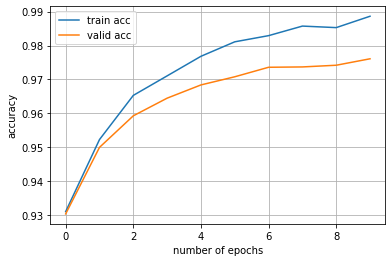

In [10]:
plt.plot(train_acc_his, label='train acc')
plt.plot(valid_acc_his, label='valid acc')
plt.grid('on')
plt.xlabel('number of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()